In [ ]:
import math
import datetime

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importing Data
csv_data = pd.read_csv('/content/NYPD_Data.csv')
df = pd.DataFrame(csv_data)

In [ ]:
df

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,247853895,43.0,BRONX,07/11/2022,09:09:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,1022682.0,242998.0,40.833567,-73.861118,"(40.833567, -73.861118)",POINT (-73.861118 40.833567)
1,250722124,67.0,BROOKLYN,01/01/2021,12:00:00,09/07/2022,12:00:00,COMPLETED,(null),NaN,...,NaN,<18,BLACK,F,997843.0,175671.0,40.648851,-73.951017,"(40.6488507469884, -73.951016510623)",POINT (-73.951016510623 40.6488507469884)
2,239511545,120.0,STATEN ISLAND,12/24/2021,08:00:00,01/03/2022,08:00:00,COMPLETED,(null),NaN,...,NaN,18-24,ASIAN / PACIFIC ISLANDER,M,960911.0,165085.0,40.619768,-74.084070,"(40.619768, -74.08407)",POINT (-74.08407 40.619768)
3,247992275,115.0,QUEENS,06/15/2015,00:01:00,07/13/2022,17:00:00,COMPLETED,(null),NaN,...,NaN,45-64,WHITE,M,1013677.0,212463.0,40.749791,-73.893792,"(40.749791, -73.893792)",POINT (-73.893792 40.749791)
4,239602232,75.0,BROOKLYN,01/01/2018,09:00:00,04/14/2021,23:59:00,COMPLETED,(null),NaN,...,NaN,65+,BLACK,M,1022153.0,184000.0,40.671636,-73.863359,"(40.671636, -73.863359)",POINT (-73.863359 40.671636)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396973,251818673,46.0,BRONX,09/29/2022,08:30:00,09/29/2022,08:45:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,F,1011329.0,249447.0,40.851308,-73.902116,"(40.851308, -73.902116)",POINT (-73.902116 40.851308)
396974,251891178,94.0,BROOKLYN,09/30/2022,22:55:00,09/30/2022,23:02:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,999651.0,199731.0,40.714880,-73.944444,"(40.71488, -73.944444)",POINT (-73.944444 40.71488)
396975,251788586,79.0,BROOKLYN,09/29/2022,16:15:00,09/29/2022,16:18:00,COMPLETED,(null),510.0,...,NaN,UNKNOWN,UNKNOWN,E,1000180.0,193720.0,40.698381,-73.942550,"(40.698381, -73.94255)",POINT (-73.94255 40.698381)
396976,251833912,70.0,BROOKLYN,09/30/2022,12:00:00,09/30/2022,12:05:00,COMPLETED,(null),NaN,...,NaN,65+,BLACK,F,998374.0,171494.0,40.637378,-73.949109,"(40.637378, -73.949109)",POINT (-73.949109 40.637378)


# Data Cleaning

In [ ]:
# Drop unwanted columns
df.drop(["CMPLNT_TO_DT", "CMPLNT_TO_TM", "HADEVELOPT", "HOUSING_PSA", "JURISDICTION_CODE", "JURIS_DESC", "PARKS_NM", "PATROL_BORO", "PD_CD", "PD_DESC", "STATION_NAME", "TRANSIT_DISTRICT", "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude", "Lat_Lon", "New Georeferenced Column"], axis=1, inplace=True )

In [ ]:
# Rename Columns
df.rename(columns={"CMPLNT_NUM" : "Complaint_Id",
"ADDR_PCT_CD": "Neighborhood",
"BORO_NM": "Borough",
"CMPLNT_FR_DT": "Start_Date",
"CMPLNT_FR_TM": "Start_Time",
"CRM_ATPT_CPTD_CD": "Status",
"KY_CD": "Offence_Code",
"LAW_CAT_CD": "Offence_Category",
"LOC_OF_OCCUR_DESC": "Offence_Location",
"OFNS_DESC": "Offence_Type",
"PREM_TYP_DESC": "Offence_Location_Type",
"RPT_DT": "Reported_Date",
"SUSP_AGE_GROUP": "Suspect_Age",
"SUSP_RACE" : "Suspect_Race",
"SUSP_SEX": "Suspect_Sex",
"VIC_AGE_GROUP": "Victim_Age",
"VIC_RACE": "Victim_Race",
"VIC_SEX": "Victim_Sex"}, inplace=True)

In [ ]:
df

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,Offence_Location_Type,Reported_Date,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex
0,247853895,43.0,BRONX,07/11/2022,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,BANK,07/11/2022,25-44,BLACK,M,UNKNOWN,UNKNOWN,D
1,250722124,67.0,BROOKLYN,01/01/2021,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,RESIDENCE - APT. HOUSE,09/07/2022,25-44,UNKNOWN,U,<18,BLACK,F
2,239511545,120.0,STATEN ISLAND,12/24/2021,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,RESIDENCE-HOUSE,01/21/2022,(null),(null),(null),18-24,ASIAN / PACIFIC ISLANDER,M
3,247992275,115.0,QUEENS,06/15/2015,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,RESIDENCE - APT. HOUSE,07/13/2022,(null),(null),(null),45-64,WHITE,M
4,239602232,75.0,BROOKLYN,01/01/2018,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,RESIDENCE - APT. HOUSE,01/24/2022,(null),(null),(null),65+,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396973,251818673,46.0,BRONX,09/29/2022,08:30:00,COMPLETED,578,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE - APT. HOUSE,09/29/2022,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,F
396974,251891178,94.0,BROOKLYN,09/30/2022,22:55:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,STORE UNCLASSIFIED,09/30/2022,18-24,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,D
396975,251788586,79.0,BROOKLYN,09/29/2022,16:15:00,COMPLETED,118,FELONY,FRONT OF,DANGEROUS WEAPONS,RESIDENCE - PUBLIC HOUSING,09/29/2022,<18,BLACK,M,UNKNOWN,UNKNOWN,E
396976,251833912,70.0,BROOKLYN,09/30/2022,12:00:00,COMPLETED,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,RESIDENCE-HOUSE,09/30/2022,25-44,BLACK,M,65+,BLACK,F


In [ ]:
df = df.replace('(null)', np.NaN)
df = df.replace('', np.NaN)

In [ ]:
df

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,Offence_Location_Type,Reported_Date,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex
0,247853895,43.0,BRONX,07/11/2022,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,BANK,07/11/2022,25-44,BLACK,M,UNKNOWN,UNKNOWN,D
1,250722124,67.0,BROOKLYN,01/01/2021,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,RESIDENCE - APT. HOUSE,09/07/2022,25-44,UNKNOWN,U,<18,BLACK,F
2,239511545,120.0,STATEN ISLAND,12/24/2021,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,RESIDENCE-HOUSE,01/21/2022,NaN,NaN,NaN,18-24,ASIAN / PACIFIC ISLANDER,M
3,247992275,115.0,QUEENS,06/15/2015,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,RESIDENCE - APT. HOUSE,07/13/2022,NaN,NaN,NaN,45-64,WHITE,M
4,239602232,75.0,BROOKLYN,01/01/2018,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,RESIDENCE - APT. HOUSE,01/24/2022,NaN,NaN,NaN,65+,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396973,251818673,46.0,BRONX,09/29/2022,08:30:00,COMPLETED,578,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE - APT. HOUSE,09/29/2022,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,F
396974,251891178,94.0,BROOKLYN,09/30/2022,22:55:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,STORE UNCLASSIFIED,09/30/2022,18-24,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,D
396975,251788586,79.0,BROOKLYN,09/29/2022,16:15:00,COMPLETED,118,FELONY,FRONT OF,DANGEROUS WEAPONS,RESIDENCE - PUBLIC HOUSING,09/29/2022,<18,BLACK,M,UNKNOWN,UNKNOWN,E
396976,251833912,70.0,BROOKLYN,09/30/2022,12:00:00,COMPLETED,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,RESIDENCE-HOUSE,09/30/2022,25-44,BLACK,M,65+,BLACK,F


In [ ]:
df.isnull().sum()

Complaint_Id                 0
Neighborhood                20
Borough                    657
Start_Date                   0
Start_Time                   0
Status                       0
Offence_Code                 0
Offence_Category             0
Offence_Location         66081
Offence_Type                 5
Offence_Location_Type      476
Reported_Date                0
Suspect_Age              73528
Suspect_Race             73528
Suspect_Sex              73528
Victim_Age                   0
Victim_Race                104
Victim_Sex                   0
dtype: int64

In [ ]:
df['Neighborhood'] = df['Neighborhood'].fillna(0)
df['Borough'] = df['Borough'].fillna('UNKNOWN')
df.isnull().sum()

Complaint_Id                 0
Neighborhood                 0
Borough                      0
Start_Date                   0
Start_Time                   0
Status                       0
Offence_Code                 0
Offence_Category             0
Offence_Location         66081
Offence_Type                 5
Offence_Location_Type      476
Reported_Date                0
Suspect_Age              73528
Suspect_Race             73528
Suspect_Sex              73528
Victim_Age                   0
Victim_Race                104
Victim_Sex                   0
dtype: int64

In [ ]:
df.update(df[["Offence_Location", "Offence_Type", "Offence_Location_Type", "Suspect_Race", "Victim_Race", "Suspect_Age", "Victim_Age"]].fillna("UNKNOWN"))

In [ ]:
df['Suspect_Sex'] = df['Suspect_Sex'].fillna('U')

In [ ]:
df

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,Offence_Location_Type,Reported_Date,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex
0,247853895,43.0,BRONX,07/11/2022,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,BANK,07/11/2022,25-44,BLACK,M,UNKNOWN,UNKNOWN,D
1,250722124,67.0,BROOKLYN,01/01/2021,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,RESIDENCE - APT. HOUSE,09/07/2022,25-44,UNKNOWN,U,<18,BLACK,F
2,239511545,120.0,STATEN ISLAND,12/24/2021,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,RESIDENCE-HOUSE,01/21/2022,UNKNOWN,UNKNOWN,U,18-24,ASIAN / PACIFIC ISLANDER,M
3,247992275,115.0,QUEENS,06/15/2015,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,RESIDENCE - APT. HOUSE,07/13/2022,UNKNOWN,UNKNOWN,U,45-64,WHITE,M
4,239602232,75.0,BROOKLYN,01/01/2018,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,RESIDENCE - APT. HOUSE,01/24/2022,UNKNOWN,UNKNOWN,U,65+,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396973,251818673,46.0,BRONX,09/29/2022,08:30:00,COMPLETED,578,VIOLATION,INSIDE,HARRASSMENT 2,RESIDENCE - APT. HOUSE,09/29/2022,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,F
396974,251891178,94.0,BROOKLYN,09/30/2022,22:55:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,STORE UNCLASSIFIED,09/30/2022,18-24,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,D
396975,251788586,79.0,BROOKLYN,09/29/2022,16:15:00,COMPLETED,118,FELONY,FRONT OF,DANGEROUS WEAPONS,RESIDENCE - PUBLIC HOUSING,09/29/2022,<18,BLACK,M,UNKNOWN,UNKNOWN,E
396976,251833912,70.0,BROOKLYN,09/30/2022,12:00:00,COMPLETED,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,RESIDENCE-HOUSE,09/30/2022,25-44,BLACK,M,65+,BLACK,F


In [ ]:
df.isnull().sum()

Complaint_Id             0
Neighborhood             0
Borough                  0
Start_Date               0
Start_Time               0
Status                   0
Offence_Code             0
Offence_Category         0
Offence_Location         0
Offence_Type             0
Offence_Location_Type    0
Reported_Date            0
Suspect_Age              0
Suspect_Race             0
Suspect_Sex              0
Victim_Age               0
Victim_Race              0
Victim_Sex               0
dtype: int64

In [ ]:
# Datatypes of the columns
df.dtypes

Complaint_Id              object
Neighborhood             float64
Borough                   object
Start_Date                object
Start_Time                object
Status                    object
Offence_Code               int64
Offence_Category          object
Offence_Location          object
Offence_Type              object
Offence_Location_Type     object
Reported_Date             object
Suspect_Age               object
Suspect_Race              object
Suspect_Sex               object
Victim_Age                object
Victim_Race               object
Victim_Sex                object
dtype: object

In [ ]:
df[["Neighborhood"]] = df[["Neighborhood"]].astype("int64")
df.dtypes

Complaint_Id             object
Neighborhood              int64
Borough                  object
Start_Date               object
Start_Time               object
Status                   object
Offence_Code              int64
Offence_Category         object
Offence_Location         object
Offence_Type             object
Offence_Location_Type    object
Reported_Date            object
Suspect_Age              object
Suspect_Race             object
Suspect_Sex              object
Victim_Age               object
Victim_Race              object
Victim_Sex               object
dtype: object

In [ ]:
def update_date_format(dataframe, col_name, date_first):
  return np.where(
    dataframe[col_name].str.contains('/'),
    pd.to_datetime(dataframe[col_name], errors = 'coerce'),
    pd.to_datetime(dataframe[col_name], errors = 'coerce', dayfirst=date_first)
  )

df["Start_Date"] = update_date_format(df, "Start_Date", False)
df["Reported_Date"] = update_date_format(df, "Reported_Date", False)

df.dtypes

Complaint_Id                     object
Neighborhood                      int64
Borough                          object
Start_Date               datetime64[ns]
Start_Time                       object
Status                           object
Offence_Code                      int64
Offence_Category                 object
Offence_Location                 object
Offence_Type                     object
Offence_Location_Type            object
Reported_Date            datetime64[ns]
Suspect_Age                      object
Suspect_Race                     object
Suspect_Sex                      object
Victim_Age                       object
Victim_Race                      object
Victim_Sex                       object
dtype: object

In [ ]:
df[df.Start_Date.isnull()]

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,Offence_Location_Type,Reported_Date,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex
283,247350382,73,BROOKLYN,NaT,16:47:00,COMPLETED,351,MISDEMEANOR,INSIDE,CRIMINAL MISCHIEF & RELATED OF,GROCERY/BODEGA,2022-06-29,UNKNOWN,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,D
618,240025455,70,BROOKLYN,NaT,10:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,COMMERCIAL BUILDING,2022-02-02,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,D
2769,248380989,114,QUEENS,NaT,13:39:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,RESIDENCE - APT. HOUSE,2022-07-21,UNKNOWN,UNKNOWN,U,25-44,WHITE,M
5165,250905436,120,STATEN ISLAND,NaT,17:00:00,COMPLETED,578,VIOLATION,FRONT OF,HARRASSMENT 2,RESIDENCE-HOUSE,2022-09-11,UNKNOWN,UNKNOWN,U,25-44,ASIAN / PACIFIC ISLANDER,F
7503,243724728,109,QUEENS,NaT,19:00:00,COMPLETED,341,MISDEMEANOR,FRONT OF,PETIT LARCENY,STREET,2022-04-15,UNKNOWN,UNKNOWN,U,45-64,WHITE,M
10496,246348713,102,QUEENS,NaT,17:10:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,DRUG STORE,2022-06-08,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,D


In [ ]:
df = df.dropna(axis=0, subset=["Start_Date"])

In [ ]:
# New Columns for start and reported year, month

def create_year_month_cols(data_frame, col_name):
  return {
      "month": pd.DatetimeIndex(data_frame[col_name]).month,
      "year": pd.DatetimeIndex(data_frame[col_name]).year
    }

start_year_month = create_year_month_cols(df, "Start_Date")
df["Start_Date_Month"] = start_year_month["month"]
df["Start_Date_Year"] = start_year_month["year"]

rep_year_month = create_year_month_cols(df, "Reported_Date")
df["Reported_Date_Month"] = rep_year_month["month"]
df["Reported_Date_Year"] = rep_year_month["year"]

df[["Complaint_Id", "Start_Date", "Reported_Date", "Start_Date_Month", "Start_Date_Year"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,Complaint_Id,Start_Date,Reported_Date,Start_Date_Month,Start_Date_Year
0,247853895,2022-07-11,2022-07-11,7,2022
1,250722124,2021-01-01,2022-09-07,1,2021
2,239511545,2021-12-24,2022-01-21,12,2021
3,247992275,2015-06-15,2022-07-13,6,2015
4,239602232,2018-01-01,2022-01-24,1,2018
...,...,...,...,...,...
396973,251818673,2022-09-29,2022-09-29,9,2022
396974,251891178,2022-09-30,2022-09-30,9,2022
396975,251788586,2022-09-29,2022-09-29,9,2022
396976,251833912,2022-09-30,2022-09-30,9,2022


In [ ]:
# Remove data before 1st Jan 2005
df = df[df["Start_Date"] >= "2005-01-01"]

In [ ]:
df

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,...,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Start_Date_Month,Start_Date_Year,Reported_Date_Month,Reported_Date_Year
0,247853895,43,BRONX,2022-07-11,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,...,25-44,BLACK,M,UNKNOWN,UNKNOWN,D,7,2022,7,2022
1,250722124,67,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,25-44,UNKNOWN,U,<18,BLACK,F,1,2021,9,2022
2,239511545,120,STATEN ISLAND,2021-12-24,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,...,UNKNOWN,UNKNOWN,U,18-24,ASIAN / PACIFIC ISLANDER,M,12,2021,1,2022
3,247992275,115,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,...,UNKNOWN,UNKNOWN,U,45-64,WHITE,M,6,2015,7,2022
4,239602232,75,BROOKLYN,2018-01-01,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,...,UNKNOWN,UNKNOWN,U,65+,BLACK,M,1,2018,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396973,251818673,46,BRONX,2022-09-29,08:30:00,COMPLETED,578,VIOLATION,INSIDE,HARRASSMENT 2,...,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,F,9,2022,9,2022
396974,251891178,94,BROOKLYN,2022-09-30,22:55:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,...,18-24,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,D,9,2022,9,2022
396975,251788586,79,BROOKLYN,2022-09-29,16:15:00,COMPLETED,118,FELONY,FRONT OF,DANGEROUS WEAPONS,...,<18,BLACK,M,UNKNOWN,UNKNOWN,E,9,2022,9,2022
396976,251833912,70,BROOKLYN,2022-09-30,12:00:00,COMPLETED,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,...,25-44,BLACK,M,65+,BLACK,F,9,2022,9,2022


In [ ]:
df[df.duplicated("Complaint_Id")]

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,...,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Start_Date_Month,Start_Date_Year,Reported_Date_Month,Reported_Date_Year
4604,240776535H1,46,BRONX,2022-01-01,02:45:00,COMPLETED,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,18-24,WHITE HISPANIC,M,25-44,BLACK,M,1,2022,1,2022
8225,242029394H1,47,BRONX,2021-06-01,12:00:00,COMPLETED,101,FELONY,INSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,25-44,BLACK,F,<18,BLACK,M,6,2021,3,2022
9300,240776535H1,46,BRONX,2022-01-01,02:45:00,COMPLETED,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,<18,WHITE HISPANIC,M,25-44,BLACK,M,1,2022,1,2022
11480,8101169H6113,32,MANHATTAN,2005-03-06,07:00:00,COMPLETED,101,FELONY,INSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,18-24,BLACK,M,18-24,BLACK,M,3,2005,2,2022
17846,238885819H1,44,BRONX,2022-01-09,22:54:00,COMPLETED,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,25-44,BLACK,F,25-44,BLACK HISPANIC,M,1,2022,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376481,251216080H1,67,BROOKLYN,2022-09-17,02:41:00,COMPLETED,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,UNKNOWN,UNKNOWN,U,25-44,BLACK,M,9,2022,9,2022
381155,251246675H1,0,BRONX,2022-09-16,21:46:00,COMPLETED,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,18-24,BLACK,M,25-44,BLACK,M,9,2022,9,2022
383284,251246675H1,0,BRONX,2022-09-16,21:46:00,COMPLETED,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,<18,BLACK,M,25-44,BLACK,M,9,2022,9,2022
392106,251583517H1,75,BROOKLYN,2022-09-25,03:26:00,COMPLETED,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,...,UNKNOWN,UNKNOWN,U,25-44,BLACK HISPANIC,M,9,2022,9,2022


In [ ]:
df.drop_duplicates("Complaint_Id", inplace=True)

In [ ]:
df

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,...,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Start_Date_Month,Start_Date_Year,Reported_Date_Month,Reported_Date_Year
0,247853895,43,BRONX,2022-07-11,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,...,25-44,BLACK,M,UNKNOWN,UNKNOWN,D,7,2022,7,2022
1,250722124,67,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,25-44,UNKNOWN,U,<18,BLACK,F,1,2021,9,2022
2,239511545,120,STATEN ISLAND,2021-12-24,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,...,UNKNOWN,UNKNOWN,U,18-24,ASIAN / PACIFIC ISLANDER,M,12,2021,1,2022
3,247992275,115,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,...,UNKNOWN,UNKNOWN,U,45-64,WHITE,M,6,2015,7,2022
4,239602232,75,BROOKLYN,2018-01-01,09:00:00,COMPLETED,112,FELONY,FRONT OF,THEFT-FRAUD,...,UNKNOWN,UNKNOWN,U,65+,BLACK,M,1,2018,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396973,251818673,46,BRONX,2022-09-29,08:30:00,COMPLETED,578,VIOLATION,INSIDE,HARRASSMENT 2,...,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,F,9,2022,9,2022
396974,251891178,94,BROOKLYN,2022-09-30,22:55:00,COMPLETED,341,MISDEMEANOR,INSIDE,PETIT LARCENY,...,18-24,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,D,9,2022,9,2022
396975,251788586,79,BROOKLYN,2022-09-29,16:15:00,COMPLETED,118,FELONY,FRONT OF,DANGEROUS WEAPONS,...,<18,BLACK,M,UNKNOWN,UNKNOWN,E,9,2022,9,2022
396976,251833912,70,BROOKLYN,2022-09-30,12:00:00,COMPLETED,344,MISDEMEANOR,FRONT OF,ASSAULT 3 & RELATED OFFENSES,...,25-44,BLACK,M,65+,BLACK,F,9,2022,9,2022


In [ ]:
# Adding and merging Holiday Data
csv_data = pd.read_csv('/content/holiday_list.csv')
dfh = pd.DataFrame(csv_data)
dfh = dfh.rename(columns = {
    "Date": "Start_Date",
    "Month": "Holiday_Month",
    "Day": "Holiday_Day",
    "Year": "Holiday_Year"})
dfh["Start_Date"] = pd.to_datetime(dfh["Start_Date"])
dfh

,Start_Date,Holiday,WeekDay,Holiday_Month,Holiday_Day,Holiday_Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
...,...,...,...,...,...,...
337,2006-04-16,Western Easter,Sunday,4,16,2006
338,2017-04-16,Western Easter,Sunday,4,16,2017
339,2014-04-20,Western Easter,Sunday,4,20,2014
340,2019-04-21,Western Easter,Sunday,4,21,2019


In [ ]:
merged_df = pd.merge(df,dfh, how='left', on='Start_Date')
merged_df
merged_df[["Complaint_Id", "Start_Date", "Neighborhood", "Borough", "Status", "Offence_Code", "Offence_Type", "Offence_Location",  "Holiday"]]

,Complaint_Id,Start_Date,Neighborhood,Borough,Status,Offence_Code,Offence_Type,Offence_Location,Holiday
0,247853895,2022-07-11,43,BRONX,COMPLETED,105,ROBBERY,INSIDE,NaN
1,250722124,2021-01-01,67,BROOKLYN,COMPLETED,104,RAPE,INSIDE,New Year's Day
2,239511545,2021-12-24,120,STATEN ISLAND,COMPLETED,109,GRAND LARCENY,INSIDE,Christmas Eve
3,247992275,2015-06-15,115,QUEENS,COMPLETED,112,THEFT-FRAUD,INSIDE,NaN
4,239602232,2018-01-01,75,BROOKLYN,COMPLETED,112,THEFT-FRAUD,FRONT OF,New Year's Day
...,...,...,...,...,...,...,...,...,...
396641,251818673,2022-09-29,46,BRONX,COMPLETED,578,HARRASSMENT 2,INSIDE,NaN
396642,251891178,2022-09-30,94,BROOKLYN,COMPLETED,341,PETIT LARCENY,INSIDE,NaN
396643,251788586,2022-09-29,79,BROOKLYN,COMPLETED,118,DANGEROUS WEAPONS,FRONT OF,NaN
396644,251833912,2022-09-30,70,BROOKLYN,COMPLETED,344,ASSAULT 3 & RELATED OFFENSES,FRONT OF,NaN


# Data Visualization - Graphs

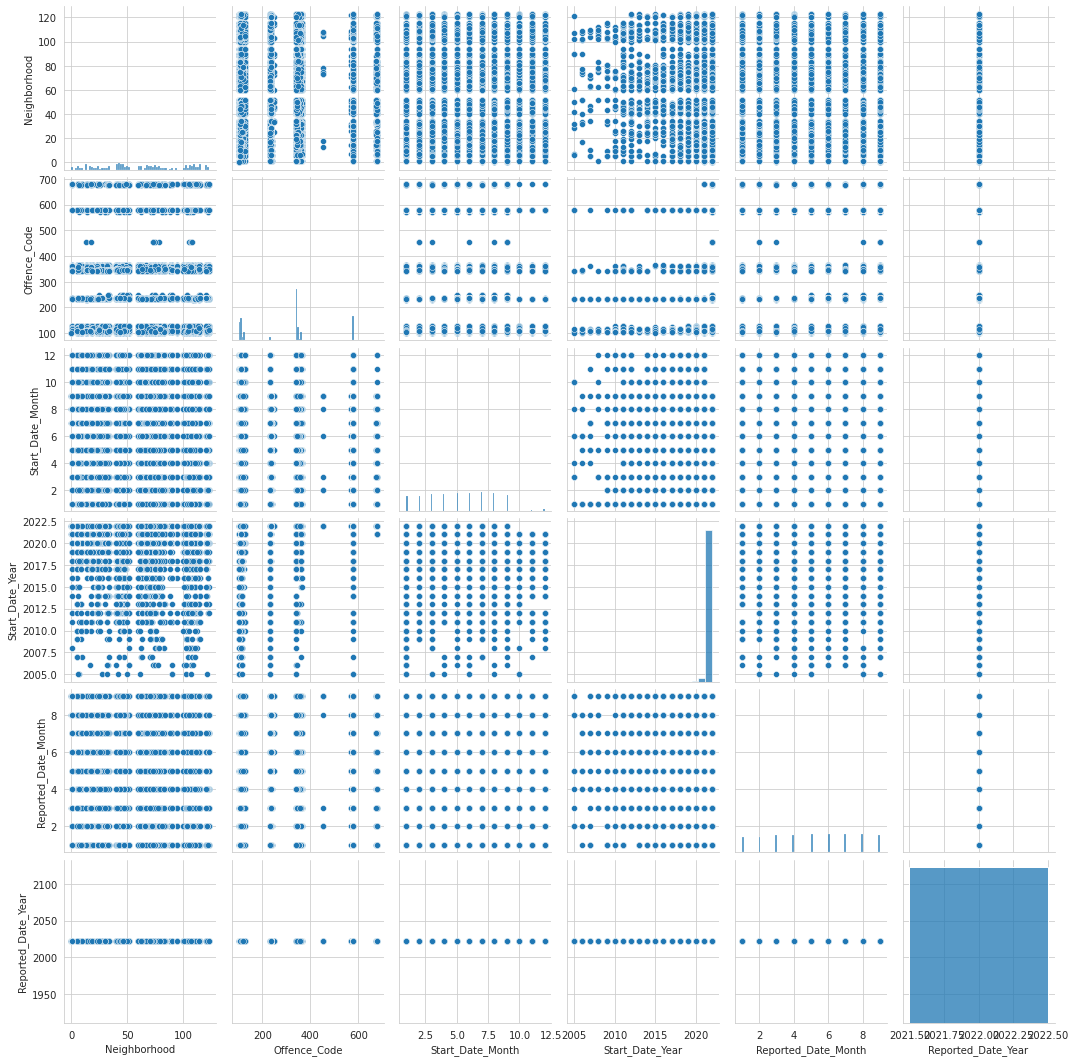

In [ ]:
sns.pairplot(data=df)

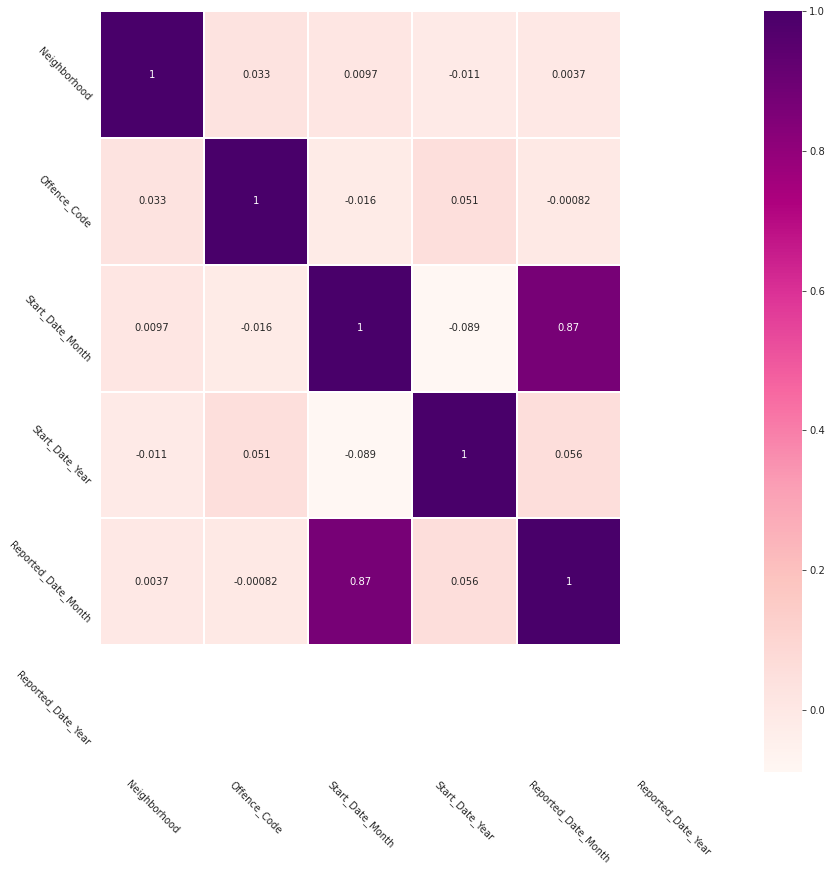

In [ ]:
def create_heatmap(data_frame):
  data_corr = df.corr()
  plt.figure(figsize=(14,14))
  sns.heatmap(data_corr, linewidth =1, cmap = 'RdPu', annot=True)
  plt.xticks(rotation=-45)
  plt.yticks(rotation=-45)

create_heatmap(df)

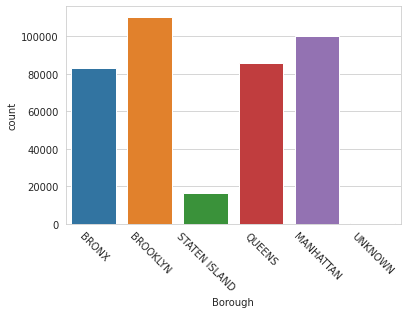

In [ ]:
# Make a Bar graph of Offence_category statistics VS Offence_Code
def create_countplot(data_frame, x, rotation):
  sns.countplot(x=x,data=data_frame)
  plt.xticks(rotation=rotation)

create_countplot(df, "Borough", -45)

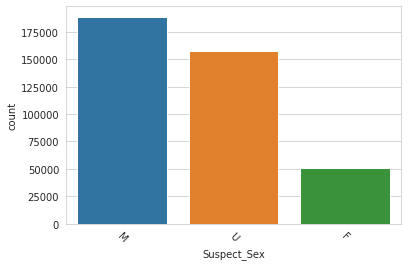

In [ ]:
create_countplot(df, "Suspect_Sex", -45)

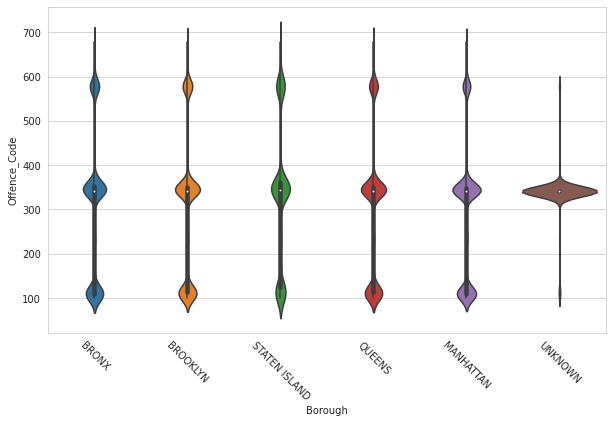

In [ ]:
# Make a violin plot of the Offence_category VS Offence_Code
def create_violin_plot(data_frame, x, y):
  plt.figure(figsize = (10,6))
  sns.violinplot(x=x,y=y,data=data_frame)
  plt.xticks(rotation=-45)

create_violin_plot(df, "Borough", "Offence_Code")

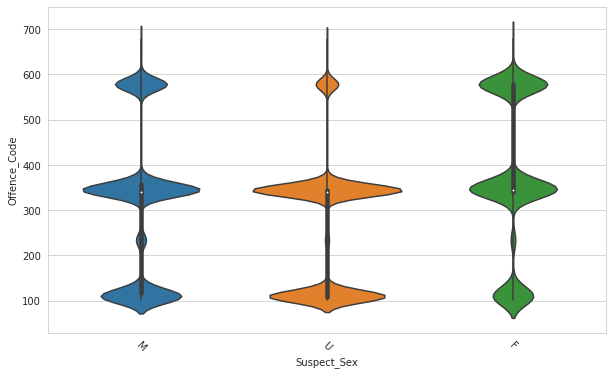

In [ ]:
create_violin_plot(df, "Suspect_Sex", "Offence_Code")

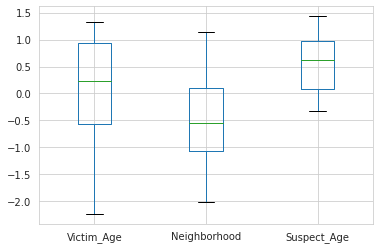

In [ ]:
# Boxplot for suspect age ,victim age,Neighborhood
def create_boxplot(data_frame, col_names):
  np.random.seed(1234)
  data_frame1 = pd.DataFrame(np.random.randn(10, 3),
                    columns=col_names)
  boxplot = data_frame1.boxplot(column=col_names)


create_boxplot(df, ['Victim_Age', 'Neighborhood', 'Suspect_Age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe765edd090>,
      dtype=object)

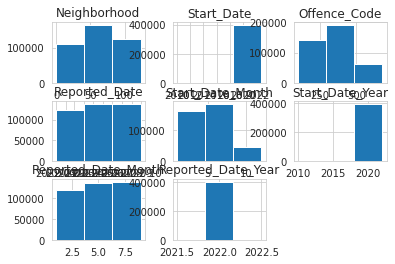

In [ ]:
# Histogram
hist = df.hist(bins=3)
hist

In [ ]:
# Create a  pandas Series for the feature Date; print out type
dfh.Start_Date
s_series=dfh.Start_Date
s_series

0     2004-07-04
1     2005-07-04
2     2006-07-04
3     2007-07-04
4     2008-07-04
         ...    
337   2006-04-16
338   2017-04-16
339   2014-04-20
340   2019-04-21
341   2011-04-24
Name: Start_Date, Length: 342, dtype: datetime64[ns]

In [ ]:
s=dfh.Start_Date.values
s

array(['2004-07-04T00:00:00.000000000', '2005-07-04T00:00:00.000000000',
       '2006-07-04T00:00:00.000000000', '2007-07-04T00:00:00.000000000',
       '2008-07-04T00:00:00.000000000', '2009-07-04T00:00:00.000000000',
       '2010-07-04T00:00:00.000000000', '2011-07-04T00:00:00.000000000',
       '2012-07-04T00:00:00.000000000', '2013-07-04T00:00:00.000000000',
       '2014-07-04T00:00:00.000000000', '2015-07-04T00:00:00.000000000',
       '2016-07-04T00:00:00.000000000', '2017-07-04T00:00:00.000000000',
       '2018-07-04T00:00:00.000000000', '2019-07-04T00:00:00.000000000',
       '2020-07-04T00:00:00.000000000', '2021-07-04T00:00:00.000000000',
       '2004-12-25T00:00:00.000000000', '2005-12-25T00:00:00.000000000',
       '2006-12-25T00:00:00.000000000', '2007-12-25T00:00:00.000000000',
       '2008-12-25T00:00:00.000000000', '2009-12-25T00:00:00.000000000',
       '2010-12-25T00:00:00.000000000', '2011-12-25T00:00:00.000000000',
       '2012-12-25T00:00:00.000000000', '2013-12-25

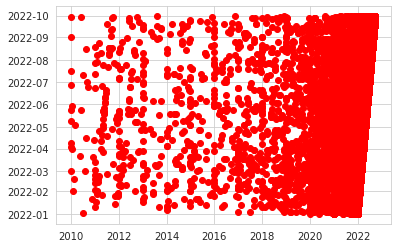

In [ ]:
# Make   1D NumPy arrays from the features Month and Holiday and do a scatter plot
# using matplotlib

a=merged_df.Start_Date.values
d=merged_df.Reported_Date.values
plt.plot(a,d,'ro')

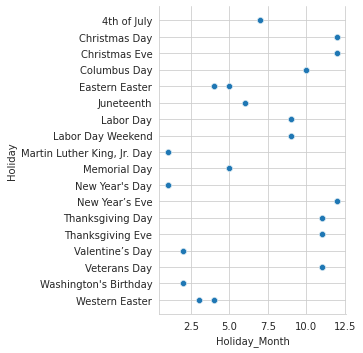

In [ ]:
# Make a scatter plot using Seaborn's relplot of Holiday statistics (y-axis)
# vs Month Stats
sns.set_style("whitegrid")
sns.relplot(x='Holiday_Month',y='Holiday',data=dfh)

# Mathematical & Statistical Operations - Numpy

In [ ]:
#finding the values by a particular index
df.iloc[20]

Complaint_Id                       248990261
Neighborhood                              79
Borough                             BROOKLYN
Start_Date               2018-11-18 00:00:00
Start_Time                          14:00:00
Status                             COMPLETED
Offence_Code                             578
Offence_Category                   VIOLATION
Offence_Location                      INSIDE
Offence_Type                   HARRASSMENT 2
Offence_Location_Type        RESIDENCE-HOUSE
Reported_Date            2022-07-22 00:00:00
Suspect_Age                          UNKNOWN
Suspect_Race                         UNKNOWN
Suspect_Sex                                M
Victim_Age                               65+
Victim_Race                            WHITE
Victim_Sex                                 F
Start_Date_Month                          11
Start_Date_Year                         2018
Reported_Date_Month                        7
Reported_Date_Year                      2022
Name: 21, 

In [ ]:
#finding the first 4 values by indexing
df.iloc[0:4]

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,...,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Start_Date_Month,Start_Date_Year,Reported_Date_Month,Reported_Date_Year
0,247853895,43,BRONX,2022-07-11,09:09:00,COMPLETED,105,FELONY,INSIDE,ROBBERY,...,25-44,BLACK,M,UNKNOWN,UNKNOWN,D,7,2022,7,2022
1,250722124,67,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,25-44,UNKNOWN,U,<18,BLACK,F,1,2021,9,2022
2,239511545,120,STATEN ISLAND,2021-12-24,08:00:00,COMPLETED,109,FELONY,INSIDE,GRAND LARCENY,...,UNKNOWN,UNKNOWN,U,18-24,ASIAN / PACIFIC ISLANDER,M,12,2021,1,2022
3,247992275,115,QUEENS,2015-06-15,00:01:00,COMPLETED,112,FELONY,INSIDE,THEFT-FRAUD,...,UNKNOWN,UNKNOWN,U,45-64,WHITE,M,6,2015,7,2022


In [ ]:
df.iloc[[0,4],[5,6]]

,Status,Offence_Code
0,COMPLETED,105
4,COMPLETED,112


In [ ]:
df.columns

Index(['Complaint_Id', 'Neighborhood', 'Borough', 'Start_Date', 'Start_Time',
       'Status', 'Offence_Code', 'Offence_Category', 'Offence_Location',
       'Offence_Type', 'Offence_Location_Type', 'Reported_Date', 'Suspect_Age',
       'Suspect_Race', 'Suspect_Sex', 'Victim_Age', 'Victim_Race',
       'Victim_Sex', 'Start_Date_Month', 'Start_Date_Year',
       'Reported_Date_Month', 'Reported_Date_Year'],
      dtype='object')

In [ ]:
#counts the genders of the data
df['Suspect_Sex'].value_counts()

M    188747
U    157067
F     50756
Name: Suspect_Sex, dtype: int64

In [ ]:
#number of boroughs in the data
df['Borough'].value_counts()

BROOKLYN         110377
MANHATTAN        100245
QUEENS            85608
BRONX             83108
STATEN ISLAND     16575
UNKNOWN             657
Name: Borough, dtype: int64

In [ ]:
#boolean values of crimes commited in brooklyn
df['Borough'] == 'BROOKLYN'

0         False
1          True
2         False
3         False
4          True
          ...  
396973    False
396974     True
396975     True
396976     True
396977    False
Name: Borough, Length: 396570, dtype: bool

In [ ]:
# displaying all the details where the offense type is rape
df.loc[df['Offence_Type'] == 'RAPE']

,Complaint_Id,Neighborhood,Borough,Start_Date,Start_Time,Status,Offence_Code,Offence_Category,Offence_Location,Offence_Type,...,Suspect_Age,Suspect_Race,Suspect_Sex,Victim_Age,Victim_Race,Victim_Sex,Start_Date_Month,Start_Date_Year,Reported_Date_Month,Reported_Date_Year
1,250722124,67,BROOKLYN,2021-01-01,12:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,25-44,UNKNOWN,U,<18,BLACK,F,1,2021,9,2022
83,239142879,52,BRONX,2021-03-29,19:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,45-64,BLACK,M,18-24,BLACK,F,3,2021,1,2022
106,243130623,78,BROOKLYN,2017-01-01,00:01:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,45-64,UNKNOWN,M,45-64,WHITE,F,1,2017,4,2022
135,243912410,60,BROOKLYN,2021-11-26,13:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,25-44,UNKNOWN,M,25-44,ASIAN / PACIFIC ISLANDER,F,11,2021,4,2022
136,250947863,43,BRONX,2021-04-01,00:00:00,ATTEMPTED,104,FELONY,INSIDE,RAPE,...,45-64,BLACK HISPANIC,M,45-64,WHITE HISPANIC,F,4,2021,9,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392709,251570309,113,QUEENS,2022-09-20,22:00:00,COMPLETED,104,FELONY,FRONT OF,RAPE,...,25-44,BLACK,M,<18,ASIAN / PACIFIC ISLANDER,F,9,2022,9,2022
394455,251612324,77,BROOKLYN,2022-09-22,01:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,45-64,BLACK,M,25-44,BLACK,F,9,2022,9,2022
395580,251433244,67,BROOKLYN,2022-09-22,06:05:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,25-44,BLACK,M,25-44,WHITE HISPANIC,F,9,2022,9,2022
395639,251570268,72,BROOKLYN,2022-09-25,01:00:00,COMPLETED,104,FELONY,INSIDE,RAPE,...,UNKNOWN,WHITE HISPANIC,M,25-44,WHITE,F,9,2022,9,2022


In [ ]:
#crimes commited in queens with the offence code
df.loc[df['Borough'] == 'QUEENS', 'Offence_Code']

3         112
11        351
16        126
29        361
32        112
         ... 
396964    351
396965    578
396970    348
396971    126
396977    358
Name: Offence_Code, Length: 85608, dtype: int64

In [ ]:
#number and types of crimes commited in the bronx
df.loc[df['Borough'] == 'BRONX', 'Offence_Category'].value_counts()

MISDEMEANOR    40369
FELONY         28381
VIOLATION      14358
Name: Offence_Category, dtype: int64

In [ ]:
# age groups with the race being black
df.loc[df['Victim_Race'] == 'BLACK', 'Suspect_Age']

1           25-44
4         UNKNOWN
8           25-44
12        UNKNOWN
17        UNKNOWN
           ...   
396961      25-44
396962    UNKNOWN
396965      25-44
396971    UNKNOWN
396976      25-44
Name: Suspect_Age, Length: 98400, dtype: object

In [ ]:
# number of offences that included forgery
df['Offence_Type'].value_counts()['FORGERY']

4351

In [ ]:
#percentage of crimes commited in each neighbourhood
df['Neighborhood'].value_counts() * 100/ len(df)

75     3.167158
14     2.439418
44     2.437401
43     2.363265
114    2.199107
         ...   
100    0.548957
123    0.503064
76     0.438258
22     0.057241
0      0.003026
Name: Neighborhood, Length: 78, dtype: float64

In [ ]:
X= df.iloc[0:4].values
Y = df.iloc[:,5].values

In [ ]:
df.max(axis=0)

Complaint_Id                            251932216
Neighborhood                                  123
Borough                                   UNKNOWN
Start_Date                    2022-09-30 00:00:00
Start_Time                               23:59:00
Status                                  COMPLETED
Offence_Code                                  678
Offence_Category                        VIOLATION
Offence_Location                          UNKNOWN
Offence_Type             VEHICLE AND TRAFFIC LAWS
Offence_Location_Type                 VIDEO STORE
Reported_Date                 2022-09-30 00:00:00
Suspect_Age                               UNKNOWN
Suspect_Race                       WHITE HISPANIC
Suspect_Sex                                     U
Victim_Age                                UNKNOWN
Victim_Race                        WHITE HISPANIC
Victim_Sex                                      M
Start_Date_Month                               12
Start_Date_Year                              2022


In [ ]:
arr = df.to_numpy()
arr

array([['247853895', 43, 'BRONX', ..., 2022, 7, 2022],
       ['250722124', 67, 'BROOKLYN', ..., 2021, 9, 2022],
       ['239511545', 120, 'STATEN ISLAND', ..., 2021, 1, 2022],
       ...,
       ['251788586', 79, 'BROOKLYN', ..., 2022, 9, 2022],
       ['251833912', 70, 'BROOKLYN', ..., 2022, 9, 2022],
       ['251833930', 107, 'QUEENS', ..., 2022, 9, 2022]], dtype=object)

In [ ]:
np.matrix(df)

matrix([['247853895', 43, 'BRONX', ..., 2022, 7, 2022],
        ['250722124', 67, 'BROOKLYN', ..., 2021, 9, 2022],
        ['239511545', 120, 'STATEN ISLAND', ..., 2021, 1, 2022],
        ...,
        ['251788586', 79, 'BROOKLYN', ..., 2022, 9, 2022],
        ['251833912', 70, 'BROOKLYN', ..., 2022, 9, 2022],
        ['251833930', 107, 'QUEENS', ..., 2022, 9, 2022]], dtype=object)

In [ ]:
np.min(df)

Complaint_Id                                  238487729
Neighborhood                                          0
Borough                                           BRONX
Start_Date                          2010-01-01 00:00:00
Start_Time                                     00:00:00
Status                                        ATTEMPTED
Offence_Code                                        101
Offence_Category                                 FELONY
Offence_Location                               FRONT OF
Offence_Type                        ADMINISTRATIVE CODE
Offence_Location_Type                ABANDONED BUILDING
Reported_Date                       2022-01-01 00:00:00
Suspect_Age                                          -1
Suspect_Race             AMERICAN INDIAN/ALASKAN NATIVE
Suspect_Sex                                           F
Victim_Age                                           -1
Victim_Race              AMERICAN INDIAN/ALASKAN NATIVE
Victim_Sex                                      